<a href="https://colab.research.google.com/github/Yasir323/100-days-of-code/blob/master/Stackoverflow_Survey_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Plan
2. Data Collection
3. Data Preparation and Cleaning

# Import Relevant Libraries

In [39]:
import zipfile  # To extract zip file
from google.colab import files  # To upload file
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

# Data Collection

In [2]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving developer_survey_2020.zip to developer_survey_2020 (3).zip
User uploaded file "developer_survey_2020.zip" with length 9908290 bytes


In [3]:
os.listdir()

['.config',
 'example.txt',
 'developer_survey_2020 (1).zip',
 '.ipynb_checkpoints',
 'developer_survey_2020 (3).zip',
 'Data',
 'developer_survey_2020.zip',
 'developer_survey_2020 (2).zip',
 'sample_data']

In [4]:
source = "developer_survey_2020.zip"
dest = "Data"

In [5]:
with zipfile.ZipFile(source, 'r') as zip_ref:
    zip_ref.extractall(dest)

In [6]:
os.listdir(dest)

['so_survey_2020.pdf',
 'survey_results_public.csv',
 'README_2020.txt',
 'survey_results_schema.csv']

In [7]:
raw_df = pd.read_csv("Data/survey_results_public.csv")

In [8]:
raw_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [10]:
schema = pd.read_csv("Data/survey_results_schema.csv", index_col="Column").QuestionText

In [11]:
schema

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [12]:
schema['YearsCode']

'Including any education, how many years have you been coding in total?'

# Data preparation and Cleaning

Our analysis will be limited to:

*   Demographic of the survey respondants and the global programming community.
*   Distribution of programming skills, experience and preferences.
*   Employment-related information, preferences and opinions.



In [13]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [14]:
len(selected_columns)

20

In [15]:
df = raw_df[selected_columns].copy()
schema = schema[selected_columns].copy()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [17]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

### Data types

In [19]:
df1 = df.copy()

In [20]:
df1.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [21]:
df1.loc[df1['Age1stCode'] == 'Younger than 5 years', 'Age1stCode'] = '5' 

In [22]:
df1.loc[df1['Age1stCode'] == 'Older than 85', 'Age1stCode'] = '85'

In [23]:
df1.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', '28', '38', '23', '27', '41', '24', '53', '26', '35',
       '32', '40', '33', '36', '54', '48', '56', '45', '44', '34', '85',
       '39', '51', '68', '50', '37', '47', '43', '52', '64', '55', '58',
       '49', '76', '72', '73', '83', '63'], dtype=object)

In [24]:
df1['Age1stCode'] = pd.to_numeric(df1.Age1stCode, errors='coerce', downcast="integer")

In [25]:
df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [26]:
df1.loc[df1['YearsCodePro'] == 'Less than 1 year', 'YearsCodePro'] = '1' 
df1.loc[df1['YearsCodePro'] == 'More than 50 years', 'YearsCodePro'] = '50'
df1['YearsCodePro'] = pd.to_numeric(df1.YearsCodePro, errors='coerce', downcast="integer")

In [27]:
df1.loc[df1['YearsCode'] == 'Less than 1 year', 'YearsCode'] = '1' 
df1.loc[df1['YearsCode'] == 'More than 50 years', 'YearsCode'] = '50'
df1['YearsCode'] = pd.to_numeric(df1.YearsCode, errors='coerce', downcast="integer")

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  float64
 7   YearsCode               57684 non-null  float64
 8   YearsCodePro            46349 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [29]:
df1.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57900.000000,57684.000000,46349.000000,41151.000000
mean,30.834111,15.417271,12.719697,8.537811,40.782174
std,9.585392,5.275178,9.691183,7.852753,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [30]:
schema.WorkWeekHrs

'On average, how many hours per week do you work? Please enter a whole number in the box.'

There is some wrong information in the dataset.
For instance, Max Age is 279 and Max WorkWeekHrs is 475. Both are impossible. So we'll just drop columns with Age > 100, Age < 10 and WorkWeekHrs > 140

In [31]:
df1.drop(df1[df1.Age < 10].index, inplace=True)
df1.drop(df1[df1.Age > 100].index, inplace=True)
df1.drop(df1[df1.WorkWeekHrs > 140].index, inplace=True)

In [32]:
df1.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57745.000000,57530.000000,46198.000000,41002.000000
mean,30.832322,15.415932,12.720007,8.539655,40.024395
std,9.505965,5.267571,9.691825,7.850640,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64306 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 63917 non-null  object 
 1   Age                     45319 non-null  float64
 2   Gender                  50426 non-null  object 
 3   EdLevel                 57280 non-null  object 
 4   UndergradMajor          50871 non-null  object 
 5   Hobbyist                64261 non-null  object 
 6   Age1stCode              57745 non-null  float64
 7   YearsCode               57530 non-null  float64
 8   YearsCodePro            46198 non-null  float64
 9   LanguageWorkedWith      57236 non-null  object 
 10  LanguageDesireNextYear  53975 non-null  object 
 11  NEWLearn                56020 non-null  object 
 12  NEWStuck                54840 non-null  object 
 13  Employment              63700 non-null  object 
 14  DevType                 49225 non-null

Let's look at the gender now

In [34]:
df1.Gender.unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [35]:
df1.where(~(df1.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [36]:
df1.Gender.unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming'], dtype=object)

### Missing values

In [37]:
missing_perc = df1.isna().sum() * 100 / df1.shape[0]
missing_perc

Country                    1.088545
Age                       29.916338
Gender                    22.067925
EdLevel                   11.390850
UndergradMajor            21.284173
Hobbyist                   0.553603
Age1stCode                10.677075
YearsCode                 11.011414
YearsCodePro              28.491898
LanguageWorkedWith        11.467048
LanguageDesireNextYear    16.511679
NEWLearn                  13.336236
NEWStuck                  15.191428
Employment                 1.418219
DevType                   23.828259
WorkWeekHrs               36.533138
JobSat                    30.278668
JobFactors                23.893571
NEWOvertime               33.325040
NEWEdImpt                 25.213821
dtype: float64

# Exploratory Data Analysis

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some selection bias.

### Country

In [40]:
df = df1.copy()

In [41]:
df.Country.nunique()

183

In [45]:
top_countries = df.Country.value_counts().head(10)
top_countries

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


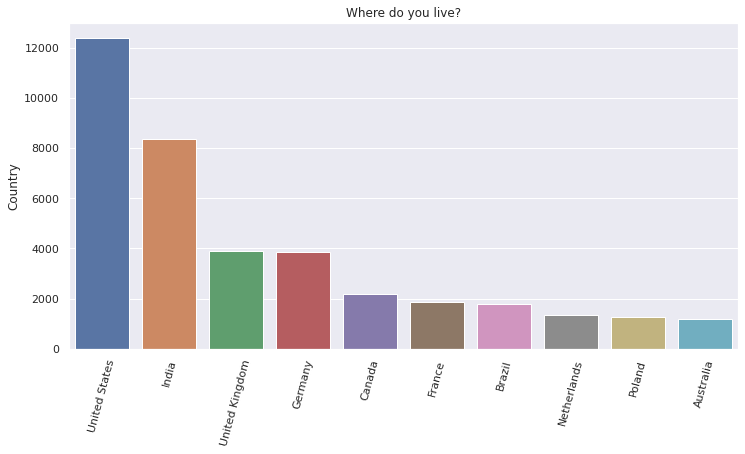

In [47]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(top_countries.index, top_countries)
plt.show()

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

### Age

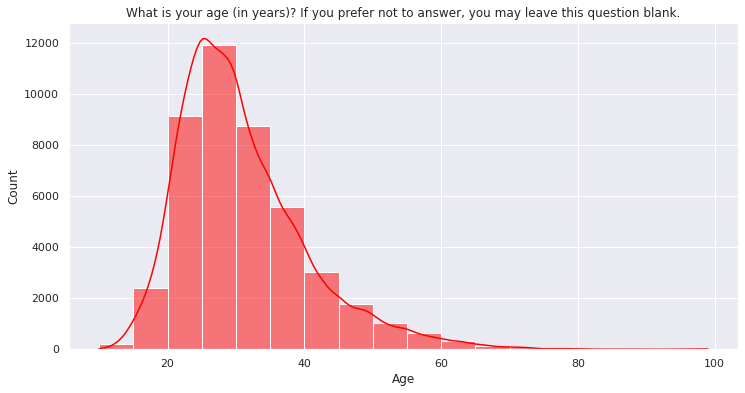

In [57]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
sns.histplot(data=df, x='Age', bins=np.arange(10, 100, 5), kde=True, color='red')
plt.show()

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

### Gender

In [59]:
gender_counts = df.Gender.value_counts(dropna=True)
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

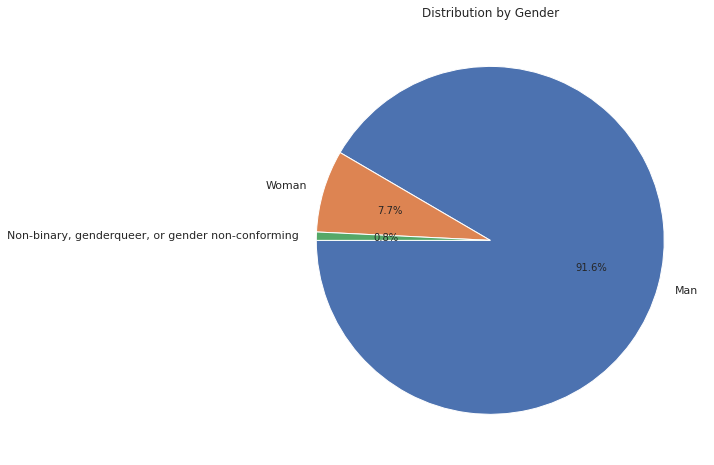

In [61]:
plt.figure(figsize=(8, 8))
plt.title("Distribution by Gender")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180)
plt.show()

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

### Education Level
Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

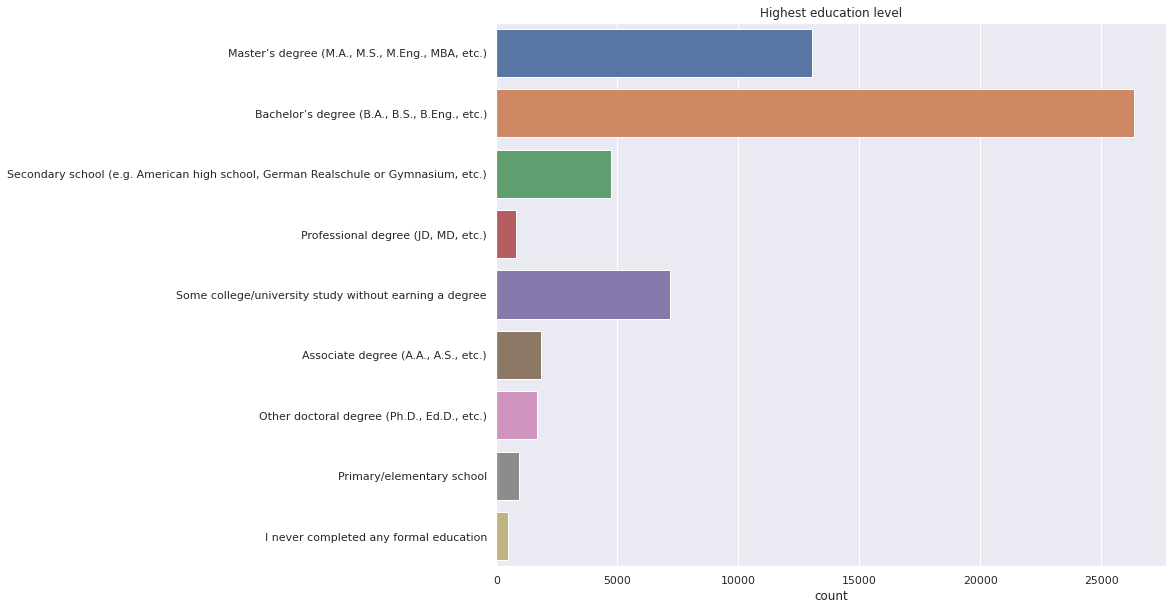

In [73]:
plt.figure(figsize=(12, 10))
sns.countplot(y=df.EdLevel)
plt.title("Highest education level")
plt.ylabel(None)
plt.show()